# Step 1: Read the dataset

In [1]:
# Import necessary libraries
import pandas as pd
# Load the dataset
# Replace 'your_dataset.csv' with the actual file name or path of your dataset
df = pd.read_csv('sentimentdataset.csv')

In [2]:
# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
# Get basic information about the dataset (column names, data types, missing values)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [4]:
# Check for missing values in each column
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [5]:
# Get a summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
display(df.describe())


Statistical Summary of Numerical Columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [6]:
# Get the unique platforms if available (e.g., Twitter, Facebook, etc.)
if 'Platform' in df.columns:
    print("\nUnique Platforms in the Dataset:")
    print(df['Platform'].unique())
else:
    print("\nNo 'Platform' column found in the dataset.")


Unique Platforms in the Dataset:
[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']


# Step 2: Data Cleaning

In [7]:
  # Drop the unnecessary columns
df_cleaned = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# Remove leading/trailing spaces from 'Platform' column
df_cleaned['Platform'] = df_cleaned['Platform'].str.strip()

# Verify the changes
print("Cleaned Unique Platforms in the Dataset:")
print(df_cleaned['Platform'].unique())

# Display the first few rows of the cleaned dataset
display(df_cleaned.head())

Cleaned Unique Platforms in the Dataset:
['Twitter' 'Instagram' 'Facebook']


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


# Step 3: Text Preprocessing

In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text using spaCy
def preprocess_text_spacy(text):
    # Process text with spaCy
    doc = nlp(text.lower())
    # Remove stopwords, punctuation, and lemmatize tokens
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(words)

# Apply the preprocessing to the 'Text' column
df_cleaned['Cleaned_Text'] = df_cleaned['Text'].apply(preprocess_text_spacy)

# Display the cleaned text data
print("Sample of Cleaned Text Data (spaCy):")
display(df_cleaned[['Text', 'Cleaned_Text']].head())

Sample of Cleaned Text Data (spaCy):


,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoy beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finish amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,try new recipe dinner tonight


# Step 4: Sentiment Mapping

In [10]:
print(df_cleaned['Sentiment'].unique())

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [11]:
# Define a mapping dictionary to consolidate sentiments
sentiment_mapping = {
    'Positive': ['positive', 'joy', 'happiness', 'euphoria', 'gratitude', 'pride', 'excited', 'admiration', 'anticipation', 'hope', 'enthusiasm', 'affection', 'love', 'amusement'],
    'Negative': ['negative', 'anger', 'fear', 'sadness', 'disgust', 'frustration', 'loneliness', 'grief', 'regret', 'betrayal', 'resentment', 'despair', 'jealousy', 'anxiety'],
    'Neutral': ['neutral', 'calmness', 'confusion', 'serenity', 'acceptance', 'indifference']
}

# Function to map the sentiment column to broader categories
def map_sentiment(sentiment):
    sentiment_lower = sentiment.strip().lower()  # Normalize text
    for category, sentiments in sentiment_mapping.items():
        if any(s in sentiment_lower for s in sentiments):
            return category
    return 'Neutral'  # Default to Neutral if no match

# Apply the sentiment mapping function to the 'Sentiment' column
df_cleaned['Mapped_Sentiment'] = df_cleaned['Sentiment'].apply(map_sentiment)

# Check the new mapped sentiment values
print(df_cleaned['Mapped_Sentiment'].unique())

['Positive' 'Negative' 'Neutral']


# Step 5: Data Visualization

<ipython-input-12-7fbf4c69f34d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mapped_Sentiment', data=df_cleaned, palette='coolwarm')


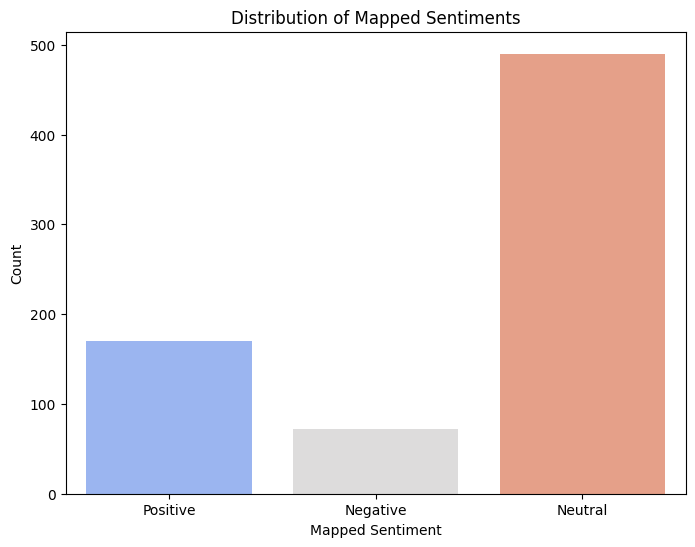

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of the new mapped sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Mapped_Sentiment', data=df_cleaned, palette='coolwarm')
plt.title('Distribution of Mapped Sentiments')
plt.xlabel('Mapped Sentiment')
plt.ylabel('Count')
plt.show()

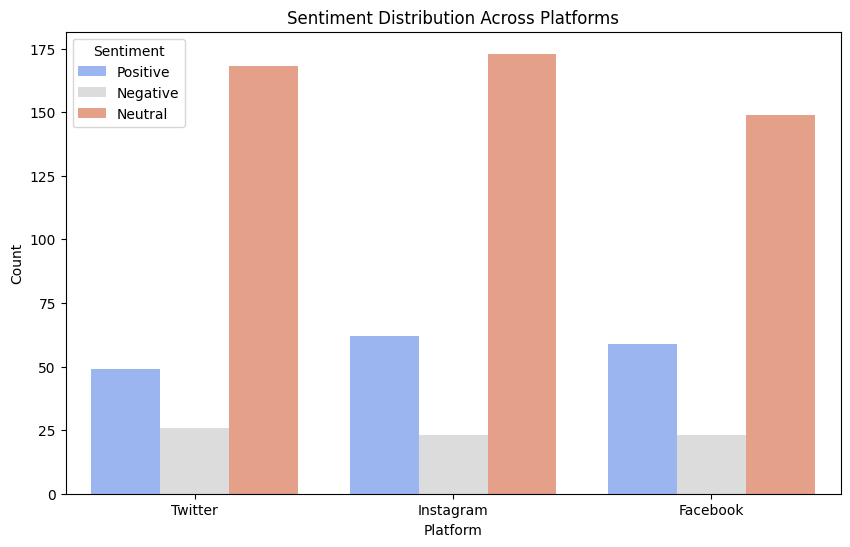

In [13]:
# Plot sentiment distribution across platforms
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='Mapped_Sentiment', data=df_cleaned, palette='coolwarm')
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1200x600 with 0 Axes>

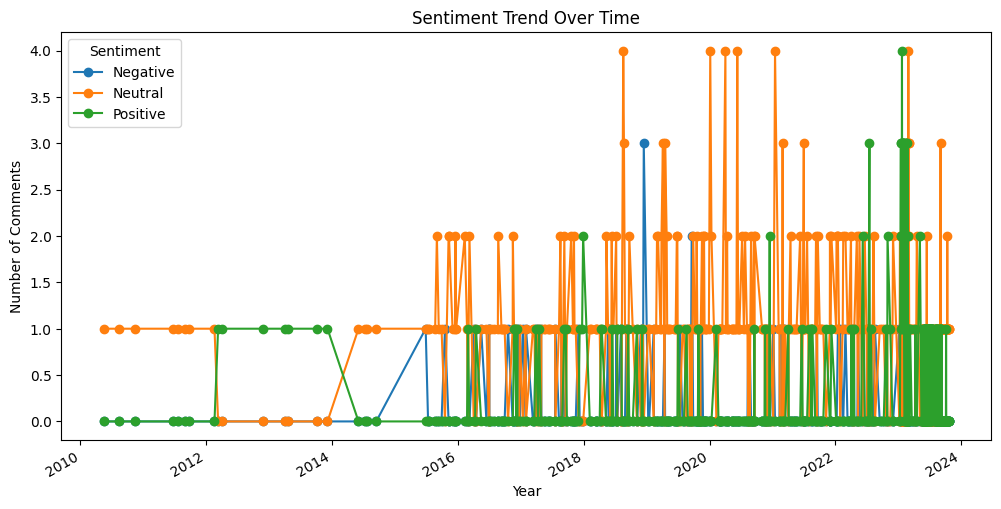

In [14]:
# Sentiment trend over time (by Year and Month)
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])

# Group by Date and Sentiment
sentiment_trends = df_cleaned.groupby(['Date', 'Mapped_Sentiment']).size().unstack(fill_value=0)

# Plot the trend
plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.show()

In [15]:
# Remove leading/trailing spaces from 'Platform' column
df_cleaned['Country'] = df_cleaned['Country'].str.strip()

# Verify the changes
print("Cleaned Unique Countries in the Dataset:")
print(df_cleaned['Country'].unique())

Cleaned Unique Countries in the Dataset:
['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


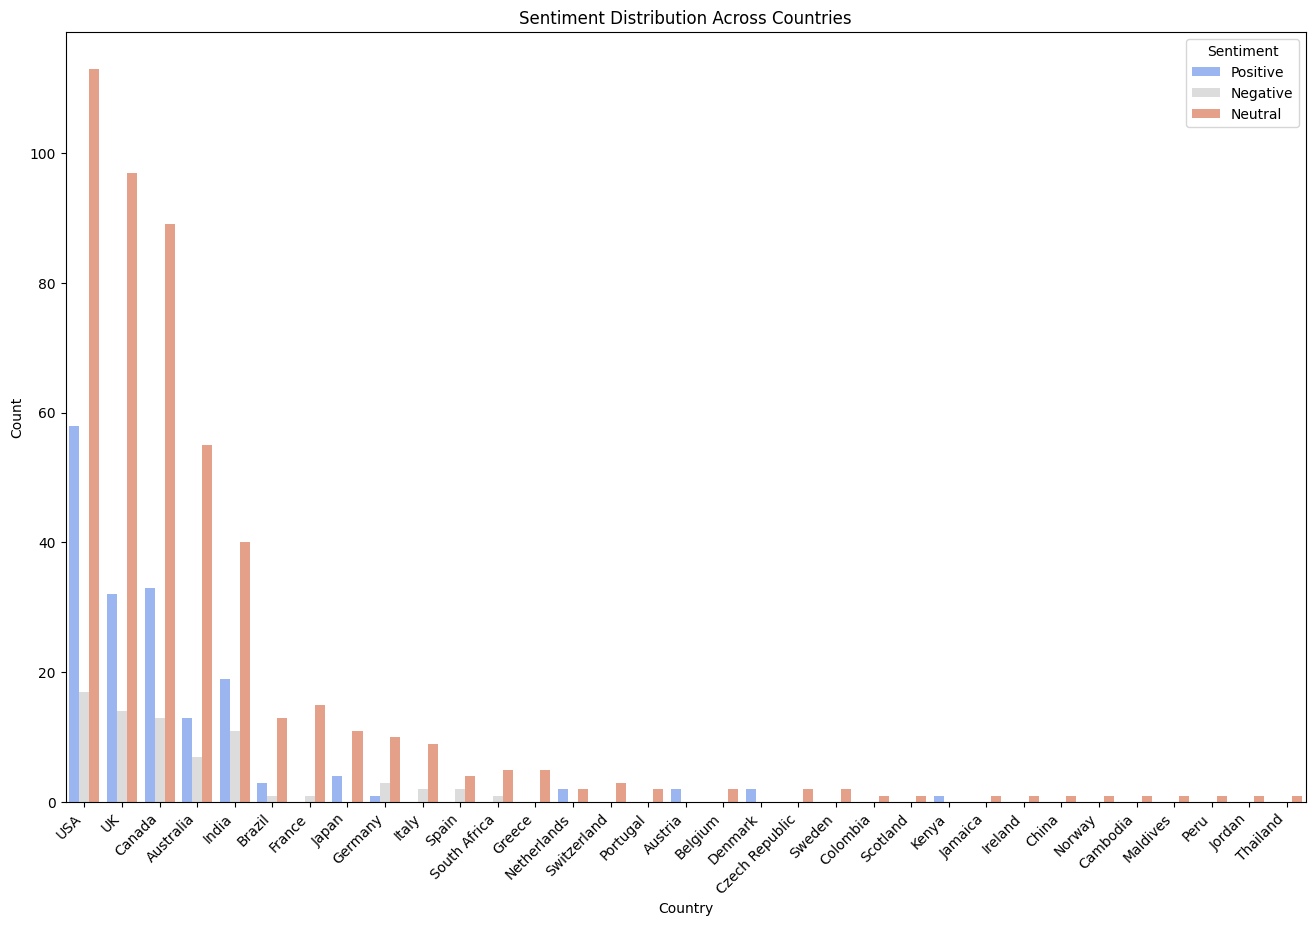

In [16]:
# Plot sentiment distribution across countries
plt.figure(figsize=(16, 10))
sns.countplot(x='Country', hue='Mapped_Sentiment', data=df_cleaned, palette='coolwarm', order=df_cleaned['Country'].value_counts().index)
plt.title('Sentiment Distribution Across Countries')
plt.xticks(rotation=45,ha = 'right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
df_cleaned.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text,Mapped_Sentiment,Date
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoy beautiful day park,Positive,2023-01-15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning,Negative,2023-01-15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finish amazing workout 💪,Positive,2023-01-15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway,Positive,2023-01-15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,try new recipe dinner tonight,Neutral,2023-01-15


In [19]:
df_new = df_cleaned[["Text",'Cleaned_Text','Mapped_Sentiment']]
df_new

,Text,Cleaned_Text,Mapped_Sentiment
0,Enjoying a beautiful day at the park! ...,enjoy beautiful day park,Positive
1,Traffic was terrible this morning. ...,traffic terrible morning,Negative
2,Just finished an amazing workout! 💪 ...,finish amazing workout 💪,Positive
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway,Positive
4,Trying out a new recipe for dinner tonight. ...,try new recipe dinner tonight,Neutral
...,...,...,...
727,Collaborating on a science project that receiv...,collaborate science project receive recognitio...,Neutral
728,Attending a surprise birthday party organized ...,attend surprise birthday party organize friend...,Neutral
729,Successfully fundraising for a school charity ...,successfully fundraise school charity initiati...,Neutral
730,"Participating in a multicultural festival, cel...",participate multicultural festival celebrate d...,Neutral


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3: Vectorize Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
x = tfidf_vectorizer.fit_transform(df_new['Text']).toarray()
y = df_new['Mapped_Sentiment']

In [21]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Step 4: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance on the training data
y_pred_train = model.predict(X_train)
# Print accuracy and other metrics
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 0.8564102564102564
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.23      0.37        53
     Neutral       0.82      1.00      0.90       391
    Positive       1.00      0.70      0.82       141

    accuracy                           0.86       585
   macro avg       0.94      0.64      0.70       585
weighted avg       0.88      0.86      0.83       585

Confusion Matrix:
[[ 12  41   0]
 [  0 391   0]
 [  0  43  98]]


In [24]:
# Create a new text input to predict
new_text = ["Hello, Have a Good Day"]

# Vectorize the new text input using the same TF-IDF vectorizer
new_text_vectorized = tfidf_vectorizer.transform(new_text).toarray()
# Predict using the trained logistic regression model
predicted_label = model.predict(new_text_vectorized)

print("Predicted Label:", predicted_label)

Predicted Label: ['Positive']


In [25]:
#en_core_web_sm